# Prediction of Parkinson’s Disease Using Voice Analysis


  > Halima Bulama-Ladan   
  > 03/16/2022



## Project Objectives:


> The objectives of this project, is to build three different models using Random Forest Classifier, LGBMClassifier, XGBClassifier respectively to detect the presence of the disease in individuals at an early stage, using voice analysis. The performance of the three models will be evaluated using evaluation metric and the model with the best scores will be chosen.



### Parkinson's Disease:


> Parkinson's disease is an ongoing, progressive disease of the nervous system that affects a patient's movement. Millions of individuals worldwide are diagnosed with Parkinson's disease. The cause of Parkinson's disease is presently not known. However, research attributes the disease to a combination of genetic and environmental factors. Age also plays a role. Most cases of Parkinson's disease begins after an individual is sixty years old.

>Unfortunately, there is currently no cure for Parkinson's disease. There are, however, medications to surpress the symptoms of the disease. Occupational therapy is also plays a huge part of treating Parkinson's disease. Overall, this condition requires intense treatment and symptom management for a patient to live a full life.

### Major Early Symptom:

>Parkinson’s disease patients typically have a low-volume voice with a monotone (expressionless) quality. The speech pattern is often produced in short bursts with inappropriate silences between words and long pauses before initiating speech. The speech may also be slurred. A small percentage of patients (about 15 percent) may also have a tremulous voice





### Source of Data

> The source of data for this project can be found from the UCI open source [data bank](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/).                  


### Attribute Information:

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn import set_config
from sklearn.impute import SimpleImputer
set_config(display = "diagram")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


## Load Dataset
>> Data downloaded from this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/).

In [5]:
#Load the data
filename = r"C:\Users\heill\Downloads\parkinsons.data"
df =pd.read_csv(filename)
#View of first 5 rows
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Data Inspection

In [6]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 195 rows, and 24 columns.


## Data Information

In [7]:
# Display the names , non- null value count and datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Data Statistics

In [8]:
df.describe().round(4)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,...,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000
mean,154.2286,197.1049,116.3246,0.0062,0.0000,0.0033,0.0034,0.0099,0.0297,0.2823,...,0.0470,0.0248,21.8860,0.7538,0.4985,0.7181,-5.6844,0.2265,2.3818,0.2066
std,41.3901,91.4915,43.5214,0.0048,0.0000,0.0030,0.0028,0.0089,0.0189,0.1949,...,0.0305,0.0404,4.4258,0.4319,0.1039,0.0553,1.0902,0.0834,0.3828,0.0901
min,88.3330,102.1450,65.4760,0.0017,0.0000,0.0007,0.0009,0.0020,0.0095,0.0850,...,0.0136,0.0006,8.4410,0.0000,0.2566,0.5743,-7.9650,0.0063,1.4233,0.0445
25%,117.5720,134.8625,84.2910,0.0035,0.0000,0.0017,0.0019,0.0050,0.0165,0.1485,...,0.0247,0.0059,19.1980,1.0000,0.4213,0.6748,-6.4501,0.1744,2.0991,0.1375
50%,148.7900,175.8290,104.3150,0.0049,0.0000,0.0025,0.0027,0.0075,0.0230,0.2210,...,0.0384,0.0117,22.0850,1.0000,0.4960,0.7223,-5.7209,0.2189,2.3615,0.1941
75%,182.7690,224.2055,140.0185,0.0074,0.0001,0.0038,0.0040,0.0115,0.0379,0.3500,...,0.0608,0.0256,25.0755,1.0000,0.5876,0.7619,-5.0462,0.2792,2.6365,0.2530
max,260.1050,592.0300,239.1700,0.0332,0.0003,0.0214,0.0196,0.0643,0.1191,1.3020,...,0.1694,0.3148,33.0470,1.0000,0.6852,0.8253,-2.4340,0.4505,3.6712,0.5274


Some columns have been observed to contain outliers. This will be investigated further and the neccessary action would be taken.

## Data Cleaning Process

### Removal of  irrelevant columns

The 'name' column representing the phone numbers of the individuals whose voices were recorded for this data set is of no relevance to this project and hence will be dropped.

In [9]:
# Removal of column "name" .
df = df.drop(columns = "name")
#Confirming changes
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Removal of Duplicates

In [10]:
# Checking for duplicate entries
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


There are no duplicates in this data set.

## Checking for null Values

In [11]:
df.isnull().sum()
#There are no null values in this data set

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no null values in this data set.

### Checking for outliers in data

In [12]:
# A function to plot a boxplot of the features
def box (columns):
    plt.rcParams["figure.figsize"] = [36, 9]
    f, axes =plt.subplots(nrows = 1, ncols = 6)
    sns.set_theme(style="whitegrid")
    sns.boxplot(ax = axes[0], x="status", y=columns[0], data=df)
    sns.boxplot(ax = axes[1], x="status", y=columns[1], data=df)
    sns.boxplot(ax = axes[2], x="status", y=columns[2], data=df)
    sns.boxplot(ax = axes[3], x="status", y=columns[3], data=df)
    sns.boxplot(ax = axes[4], x="status", y=columns[4], data=df)
    sns.boxplot(ax = axes[5], x="status", y=columns[5], data=df)
def Box (columns):
    plt.rcParams["figure.figsize"] = [30, 8]
    f, axes =plt.subplots(nrows = 1, ncols = 4)
    sns.set_theme(style="whitegrid")
    sns.boxplot(ax = axes[0], x="status", y=columns[0], data=df)
    sns.boxplot(ax = axes[1], x="status", y=columns[1], data=df)
    sns.boxplot(ax = axes[2], x="status", y=columns[2], data=df)
    sns.boxplot(ax = axes[3], x="status", y=columns[3], data=df)

### A display of the outliers and the stastistical summary of the dataset.

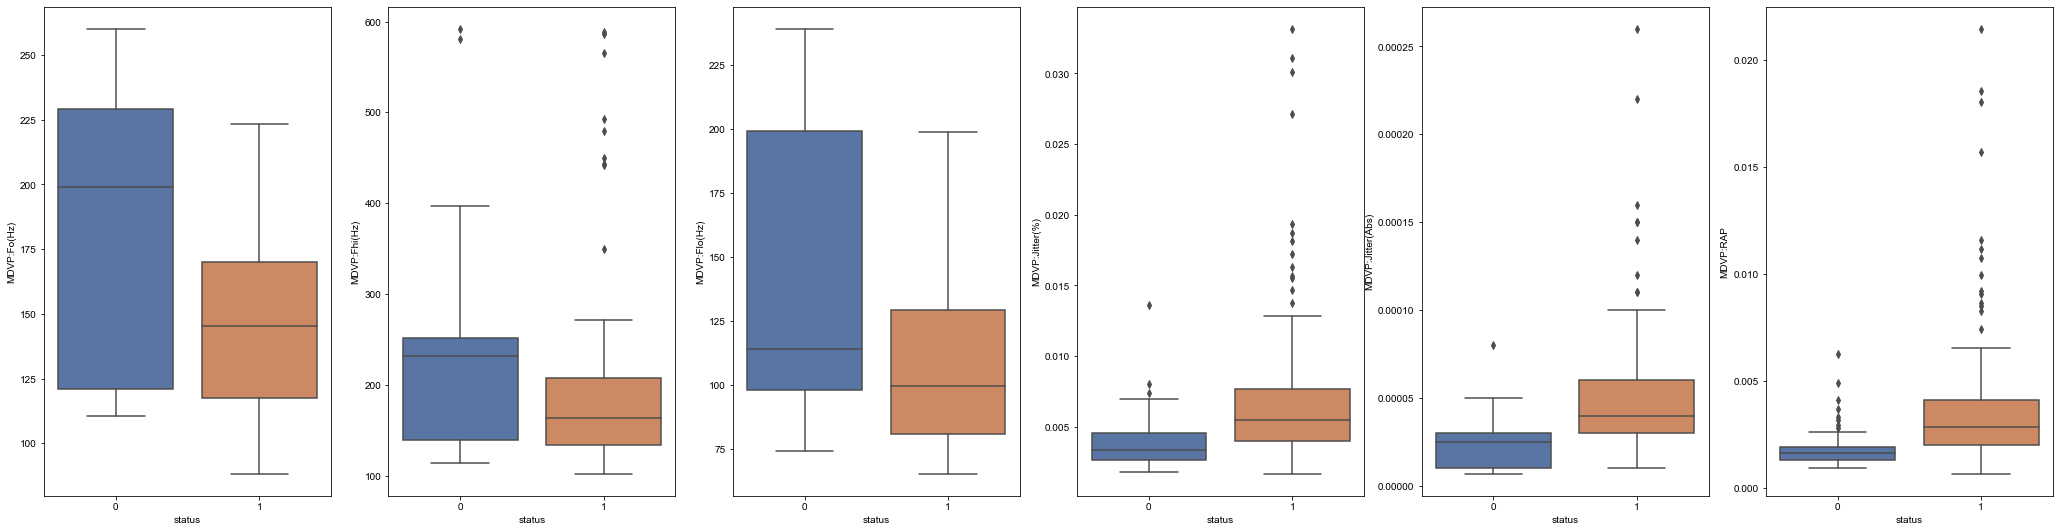

In [13]:
box_df = df.drop(columns=["status"])
box(box_df.columns[0:6])

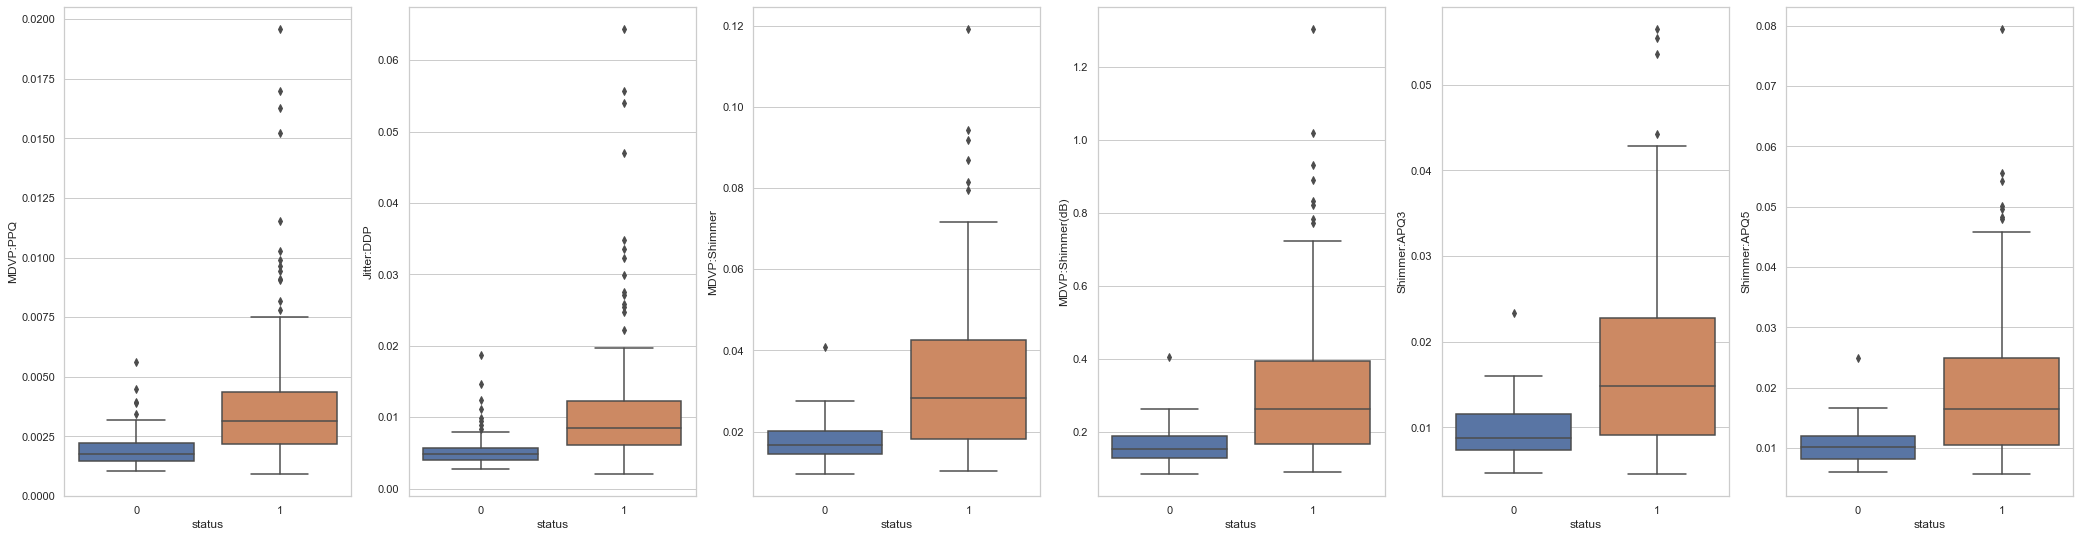

In [14]:
box(box_df.columns[6:12])

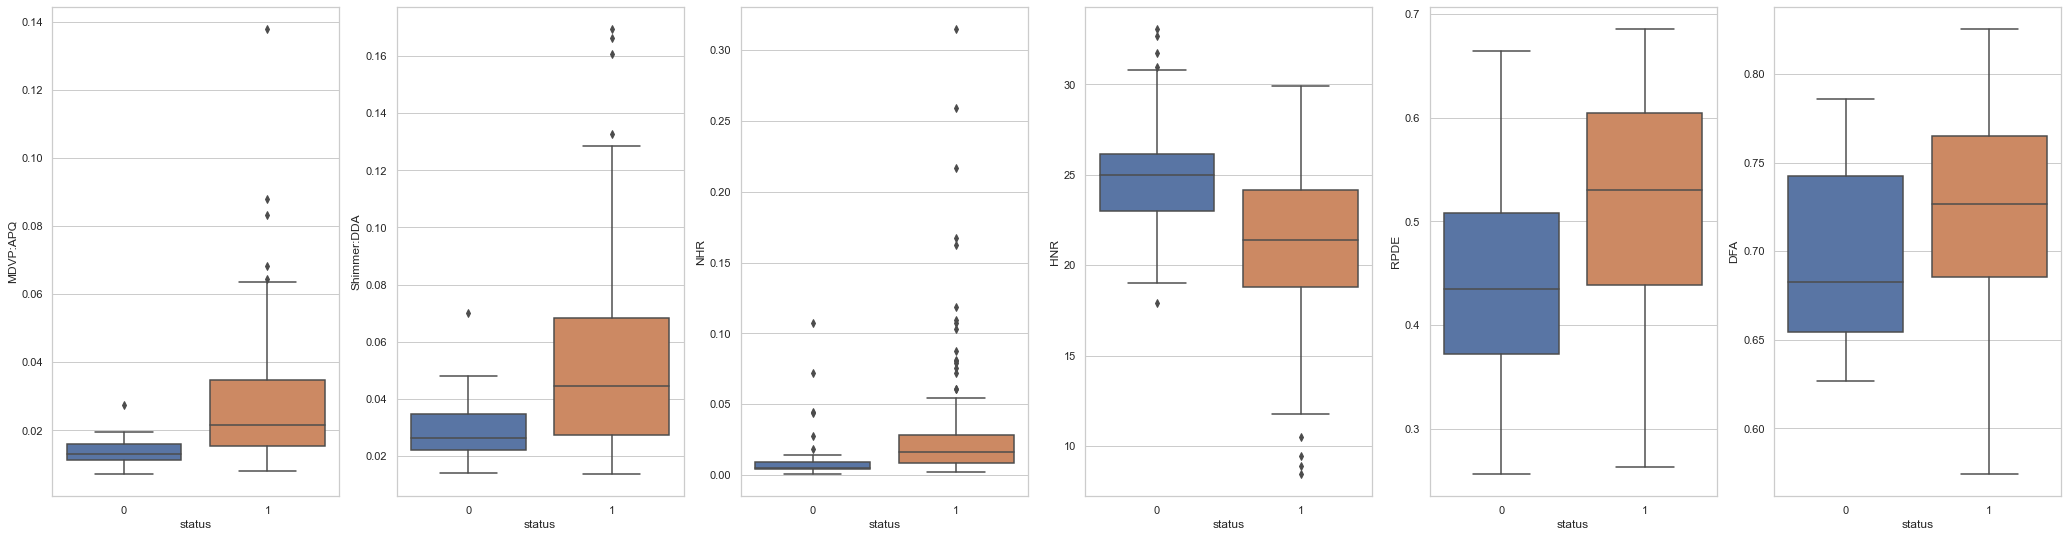

In [15]:
box(box_df.columns[12:18])

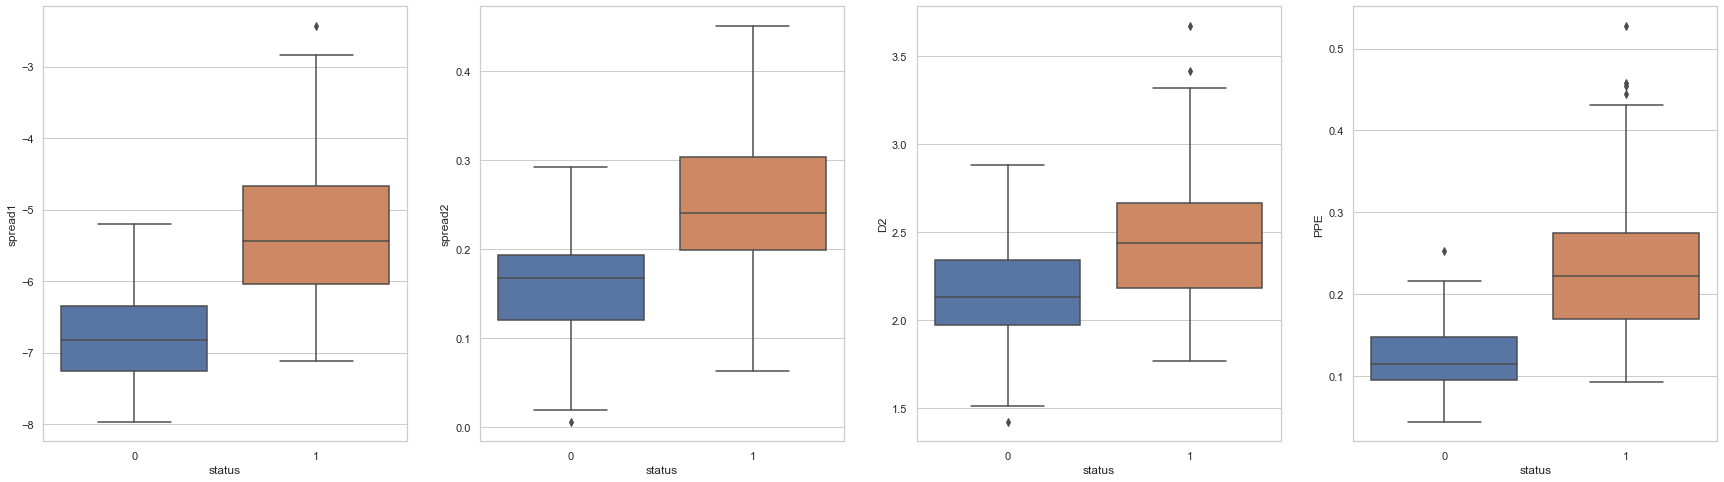

In [16]:
Box(box_df.columns[18:23])

 Calculating the amount of outliers present in each column.

In [17]:
#Calculating the number of outliers for each column
for column in df.columns:
    # Calculate the number of outliers
    outliers = np.abs(stats.zscore(df[column])) > 3
    print(f"Column {column} has {outliers.sum()} outliers")

Column MDVP:Fo(Hz) has 0 outliers
Column MDVP:Fhi(Hz) has 7 outliers
Column MDVP:Flo(Hz) has 0 outliers
Column MDVP:Jitter(%) has 4 outliers
Column MDVP:Jitter(Abs) has 5 outliers
Column MDVP:RAP has 4 outliers
Column MDVP:PPQ has 4 outliers
Column Jitter:DDP has 4 outliers
Column MDVP:Shimmer has 4 outliers
Column MDVP:Shimmer(dB) has 4 outliers
Column Shimmer:APQ3 has 3 outliers
Column Shimmer:APQ5 has 3 outliers
Column MDVP:APQ has 3 outliers
Column Shimmer:DDA has 3 outliers
Column NHR has 5 outliers
Column HNR has 1 outliers
Column status has 0 outliers
Column RPDE has 0 outliers
Column DFA has 0 outliers
Column spread1 has 0 outliers
Column spread2 has 0 outliers
Column D2 has 1 outliers
Column PPE has 1 outliers


#### Handling of outliers

The outliers in this data set will not be removed, this is because humans have varying vocal tone, some can be on the extreme lower end, with small voices, while others on the extreme higher end with deep voices. Eliminating the outliers will remove this group of people from the data set and when the model comes across a voice from this category, it will make a false diagnosis, as it was not trained on it.

## Exploratory Data Analysis

A dispaly of the distribution of the various features against the target vector (status)

In [18]:
# Defining a function to explore the relations between all features and target feature, (status) 
# using a barchart and a boxplot

def bar (columns):
    plt.rcParams["figure.figsize"] = [28, 6]
    f, axes =plt.subplots(nrows = 1, ncols = 4)
    sns.set_theme(style="whitegrid")
    sns.barplot(ax = axes[0], x="status", y=columns[0], data=df)
    sns.barplot(ax = axes[1], x="status", y=columns[1], data=df)
    sns.barplot(ax = axes[2], x="status", y=columns[2], data=df)
    sns.barplot(ax = axes[3], x="status", y=columns[3], data=df)
def Bar (columns):
    plt.rcParams["figure.figsize"] = [8, 3]
    f, axes =plt.subplots(nrows = 1, ncols = 2)
    sns.set_theme(style="whitegrid")
    sns.barplot(ax = axes[0], x="status", y=columns[0], data=df)
    sns.barplot(ax = axes[1], x="status", y=columns[1], data=df)



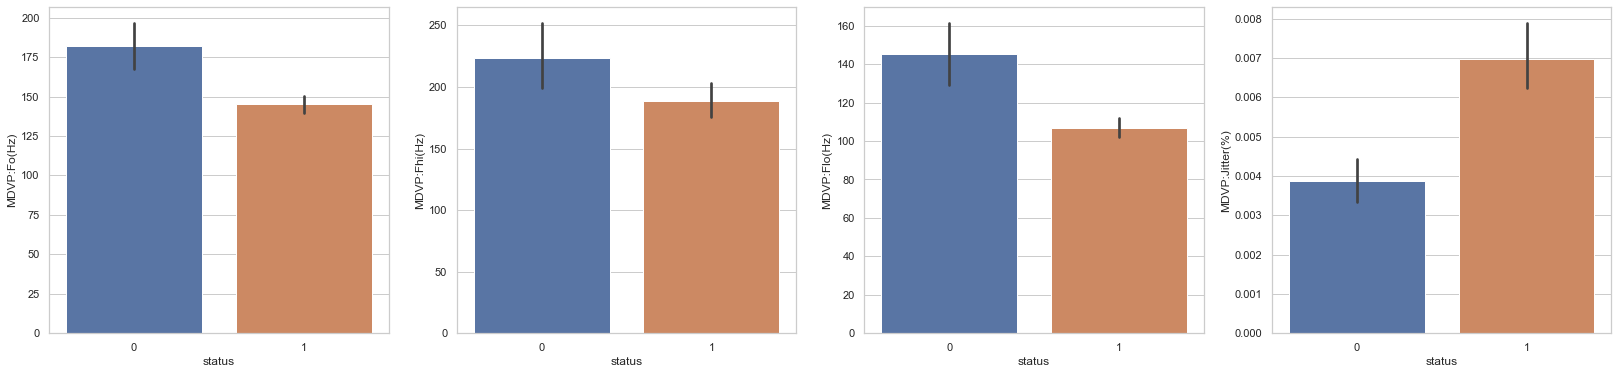

In [19]:
bar(df.columns[0:4])

**MDVP:fo(HZ):**
>- lower in PD POSITIVE 
>- higher in PD NEGATIVE
             
**MDVP:fhi(HZ)**
>- lower in PD POSITIVE 
>- higher in PD NEGATIVE


**MDVP:Flo(HZ):**
>- lower in PD positive
>- higher in PD negative
             
**MDVP:Jitter(%)**
>- higher in PD positive
>- lower in PD negative

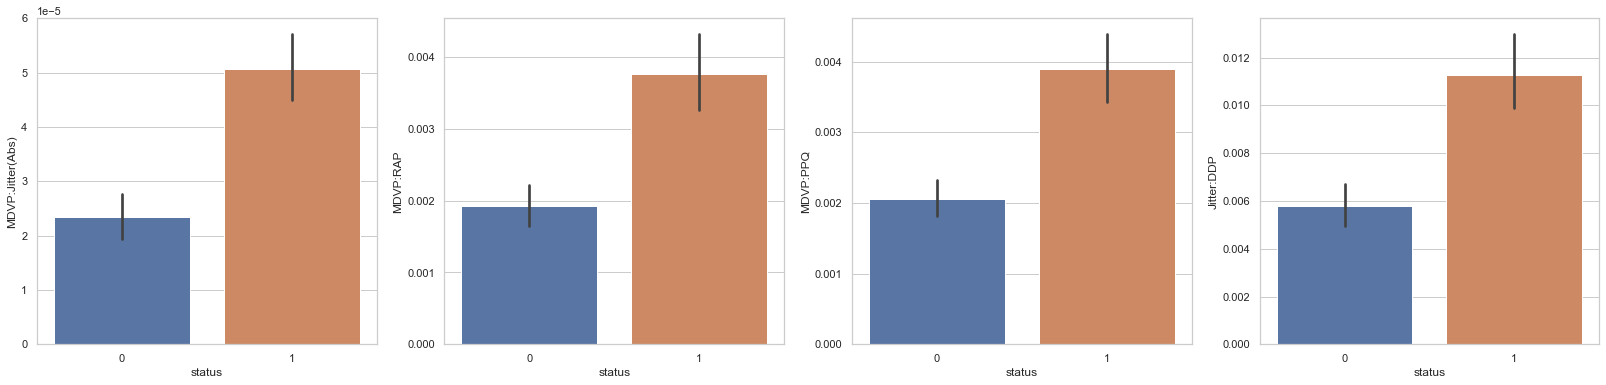

In [20]:
bar(df.columns[4:8])


**MDVP:jitter(Abs)**
>- higher in PD positive
>- lower in PD negative
             
**MDVP:RAP**
>- higher in PD positive
>- lower in PD negative


**MDVP:PPQ**
>- higher in PD positive
>- lower in PD negative
             
**Jitter:DDP**
>- higher in PD positive
>- lower in PD negative

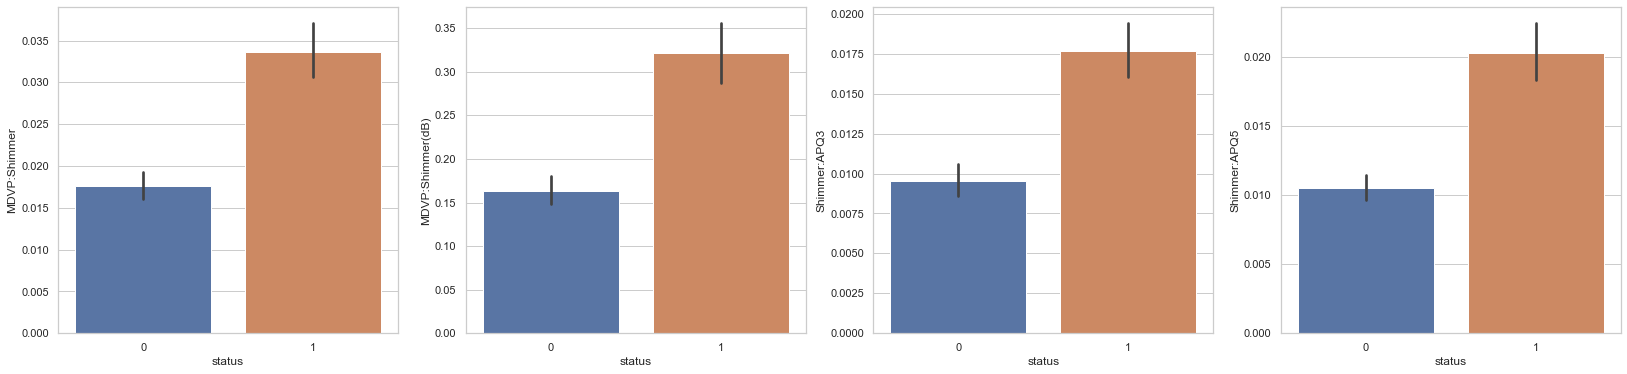

In [21]:
bar(df.columns[8:12])


**MDVP:Shimmer**
>- higher in PD positive
>- lower in PD negative
             
**MDVP:Shimmer(dB)**
>- higher in PD positive
>- lower in PD negative

**Shimmer:APQ3**
>- higher in PD positive
>- lower in PD negative
             
**Shimmer:APQ5**
>- higher in PD positive
>- lower in PD negative

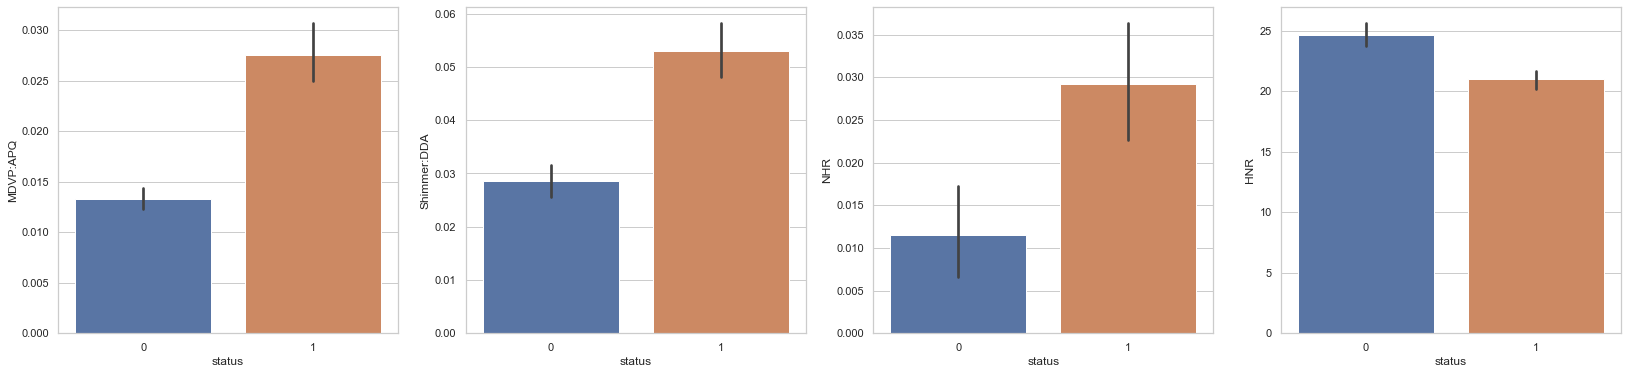

In [22]:
bar(df.columns[12:16])

**MDVP:APQ**
>- higher in PD positive
>- lower in PD negative
             
**Shimmer:DDA**
>- higher in PD positive
>- lower in PD negative

**NHR:**
>- higher in PD positive
>- lower in PD negative
             
**HNR:**
>- lower in PD positive
>- higher in PD negative

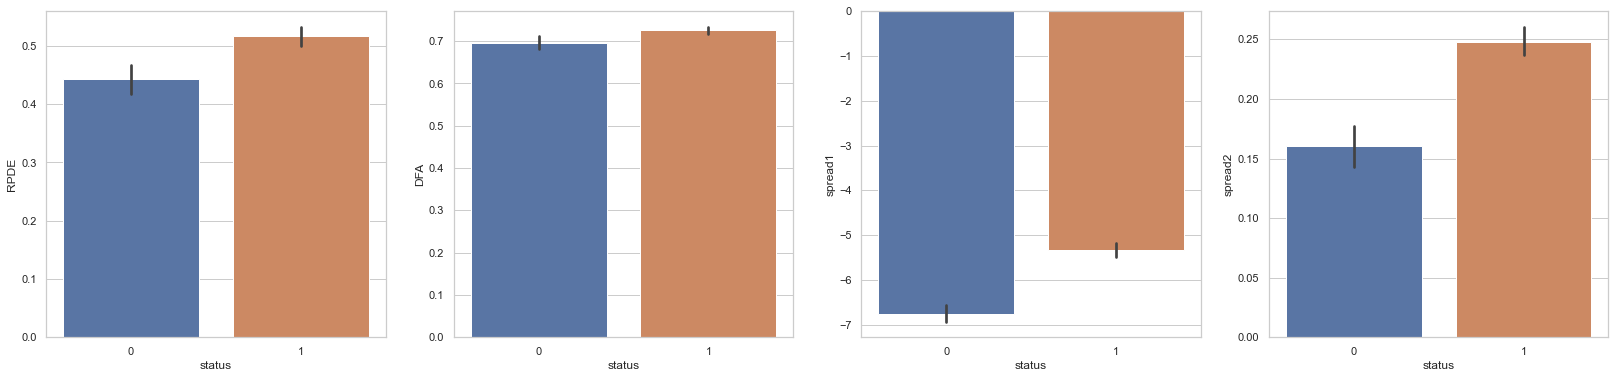

In [23]:
bar(df.columns[17:21])


**RPDE:**
>- higher in PD positive
>- lower in PD negative

**DFA:**
>- higher in PD positive
>- lower in PD negative

**Spread1:**
>- higher in PD positive
>- lower in PD negative
             
**Spread2:**
>- higher in PD positive
>- lower in PD negative

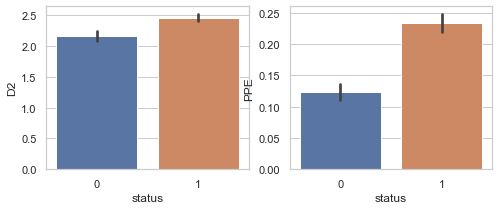

In [24]:
Bar(df.columns[21:23])


**D2:**
>- higher in PD positive
>- lower in PD negative
             
**PPE:**
>- higher in PD positive
>- lower in PD negative

## Correlation between features

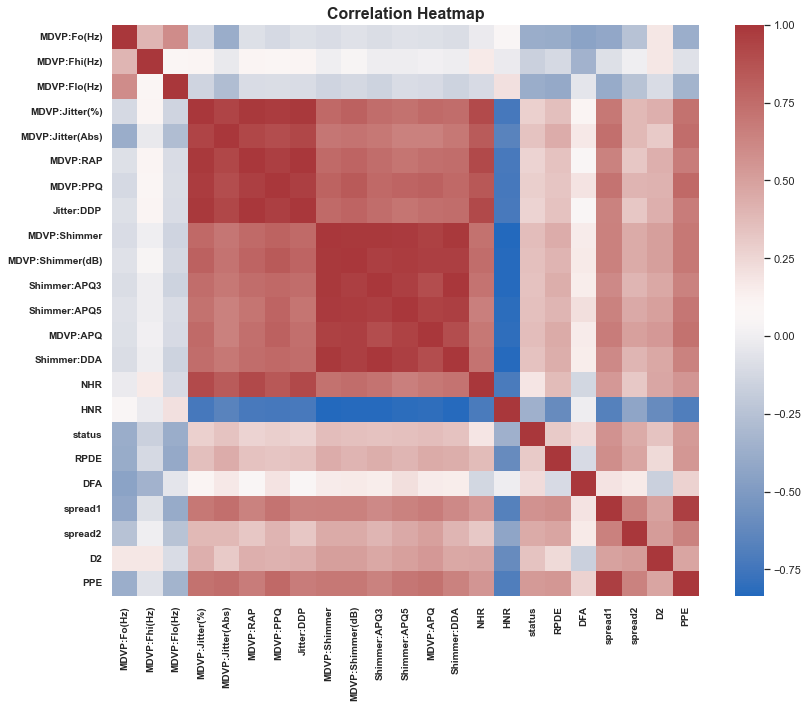

In [25]:
plt.figure(figsize = (12, 10))

corr = df.corr()
sns.heatmap(corr, cmap='vlag');

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

There appears to be a strong positive correlation amongst 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ'and 'Shimmer:DDA'.
HNR also has a negative correlation most of the features.

We can see here that the target Vector is not balanced. This imbalance will be handled during the preprocessing stage.

## Visualization of Data Clusters through dimentionality reduction(Principal Component Analysis, PCA)

This data sets has more than one dimention, which makes it impossible to visualize, therefore the principal component analysis(pca), will be used to reduce the dimentionality of the dataset into two dimentions (clusters), thereby making it possible for visualization.

**Assigning Target Vector and Independent Variable**



In [26]:
X = df.drop(columns ="status")
y = df["status"]


**Scaling Data in preparation for pca**

In [27]:
scaler =StandardScaler()
scaled_df = scaler.fit_transform(X)

**Instantiating pca**

In [28]:
pca = PCA(n_components = 2)
pca_df =pca.fit_transform(scaled_df)

le =LabelEncoder()
z= le.fit_transform(df["status"])

**Clusters representing Individuals with and without Parkinson's disease.**

C:\Users\heill\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


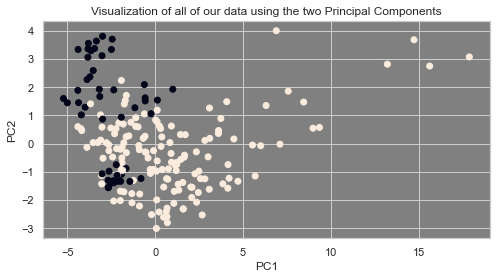

In [29]:
plt.figure(figsize = (8, 4))
#plt.scatter(pcss, c=z)
plt.scatter(pca_df[:,0], pca_df[:,1], c = z)

ax =plt.axes()
ax.set_facecolor ("grey")
plt.title('Visualization of all of our data using the two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

# Preprocessing of Data

In [30]:
#Checking and handling imalanced target
#print(f'Status(0)_counts:{df[df["status"]==0].shape[0]}')
#print(f'Status(1)_counts:{df[df["status"]==1].shape[0]}')

In [31]:
X = df.drop(columns ="status")
y = df["status"]

#smote = Smote()
#X,y = smote.fit_resample(X,y)

### Splitting data into train sets and test sets.

In [32]:
#Train, test, splitting data.
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state = 42, stratify = y)

### Instantiating Column Selector

In [33]:
#there are onlu numeric columns in this data frame
num_cols = make_column_selector(dtype_include="number")

### Instantiating Standard scaler

In [34]:
scaler =StandardScaler()

num_tuple =(scaler, num_cols)

### Instantiating Column transformer

In [35]:
column_transformer = make_column_transformer(num_tuple)

### Fitting transformer on train set

In [36]:
#fit on the train set
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002407CB85B08>)])

### Transforming data

In [37]:
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

### Inspecting transformed data

In [38]:
X_test_df  = pd.DataFrame(X_test_processed)
X_train_df = pd.DataFrame(X_train_processed)

#### Training Set

In [39]:
X_train_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,...,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.59,-1.04,-1.18,-0.91,-1.05,-0.85,-0.89,-0.85,-1.07,-1.01,...,-0.99,-1.09,-0.59,-2.82,-2.38,-2.64,-2.11,-2.65,-2.39,-1.81
25%,-0.88,-0.68,-0.73,-0.56,-0.63,-0.54,-0.56,-0.54,-0.72,-0.69,...,-0.66,-0.76,-0.47,-0.55,-0.79,-0.79,-0.71,-0.66,-0.73,-0.78
50%,-0.12,-0.24,-0.29,-0.29,-0.16,-0.30,-0.30,-0.30,-0.36,-0.35,...,-0.35,-0.28,-0.33,0.04,-0.03,0.07,0.00,-0.11,-0.08,-0.05
75%,0.65,0.26,0.46,0.17,0.38,0.12,0.17,0.12,0.47,0.37,...,0.34,0.47,-0.05,0.73,0.89,0.76,0.61,0.65,0.64,0.55
max,2.65,4.48,2.93,5.03,5.77,5.52,5.31,5.52,4.34,4.76,...,6.06,3.68,6.45,2.43,1.77,1.89,2.98,2.81,3.13,3.46


#### Testing Set

In [40]:
X_test_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,...,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
mean,0.14,0.13,0.09,-0.21,-0.20,-0.19,-0.21,-0.19,-0.29,-0.30,...,-0.32,-0.28,-0.19,0.19,-0.14,-0.18,-0.04,-0.08,-0.14,-0.16
std,1.08,1.11,1.12,0.56,0.69,0.53,0.57,0.53,0.63,0.59,...,0.52,0.65,0.50,0.73,1.02,0.98,1.01,1.21,0.71,0.92
min,-1.41,-1.03,-1.18,-0.88,-0.99,-0.83,-0.87,-0.83,-1.04,-0.99,...,-0.91,-1.08,-0.55,-1.41,-2.31,-2.08,-1.68,-2.81,-1.52,-1.49
25%,-0.81,-0.57,-0.79,-0.64,-0.70,-0.60,-0.59,-0.60,-0.73,-0.71,...,-0.70,-0.75,-0.47,-0.27,-0.70,-1.01,-0.85,-0.88,-0.71,-0.87
50%,-0.02,-0.19,-0.20,-0.35,-0.43,-0.37,-0.34,-0.37,-0.46,-0.46,...,-0.47,-0.41,-0.40,0.34,-0.26,-0.15,-0.14,-0.20,-0.13,-0.35
75%,0.86,0.43,0.61,0.06,0.11,0.08,-0.03,0.07,-0.02,-0.10,...,-0.08,-0.06,-0.01,0.72,0.79,0.68,0.38,0.57,0.30,0.24
max,2.29,4.44,2.78,1.70,2.00,1.71,1.82,1.72,1.51,1.56,...,1.42,1.45,2.05,1.44,1.64,1.78,2.53,2.61,1.72,2.41


## Building of models

### KNN Model

#### Instantiating model

In [41]:
#Instantiating model
knn =KNeighborsClassifier()

In [42]:
#Fitting of model on processed data
knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

#### Tuning for the best parameters

In [43]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
knn_parameters =  { 'n_neighbors': [5,7,8,9,10,11,12,13,14], 
                    'leaf_size': [2, 3, 4, 5,10,15,20,25,30],
                    'p':[2,3,4],
                    'weights':['distance', 'uniform']}

#### Instantiating the Gridsearch 



In [45]:
knn_grid_search =GridSearchCV(knn, knn_parameters)
knn_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'n_neighbors': [5, 7, 8, 9, 10, 11, 12, 13, 14],
                         'p': [2, 3, 4], 'weights': ['distance', 'uniform']})

In [46]:
knn_grid_search.best_params_

{'leaf_size': 2, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [47]:
best_knn = knn_grid_search.best_estimator_

#### Predictions

In [48]:
knn_train_preds = best_knn.predict(X_train_processed)
knn_test_preds =best_knn.predict(X_test_processed)

**Predictions on the training set**

In [49]:
training_set =pd.DataFrame(knn_train_preds)
training_set = training_set.rename(columns ={0 :"Preds"})
training_set.head()

,Preds
0,1
1,0
2,0
3,1
4,1


**Predictions on the testing set**

In [50]:
testing_set =pd.DataFrame(knn_test_preds)
testing_set = testing_set.rename(columns ={0 :"Preds"})
testing_set.head()

,Preds
0,1
1,1
2,1
3,1
4,0


### Model Evaluation

#### Accuracy Scores

In [51]:
# Calculate accuracy scores
knn_train_accuracy = best_knn.score(X_train_processed, y_train)
knn_test_accuracy = best_knn.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'KNN Train Accuracy Score: {round(knn_train_accuracy, 2)}')
print(f'KNN Test Accuracy Score: {round(knn_test_accuracy, 2)}')

KNN Train Accuracy Score: 1.0
KNN Test Accuracy Score: 0.92


#### Recall Scores

In [52]:
# Calculate recall scores
knn_train_recall = recall_score(y_train, knn_train_preds, pos_label=1)
knn_test_recall = recall_score(y_test, knn_test_preds, pos_label=1)
# Print classification recall scores
print(f'KNN Train Recall Score = {round(knn_train_recall, 2)}')
print(f'KNN Test Recall Score = {round(knn_test_recall, 2)}')

KNN Train Recall Score = 1.0
KNN Test Recall Score = 1.0


#### Precision Scores

In [53]:
# Calculate  precision scores
knn_train_precision = precision_score(y_train, knn_train_preds, pos_label=1)
knn_test_precision = precision_score(y_test, knn_test_preds, pos_label=1)
# Print recall scores
print(f'KNN Train Precision Score = {round(knn_train_precision, 3)}')
print(f'KNN Test Precision Score = {round(knn_test_precision, 3)}')

KNN Train Precision Score = 1.0
KNN Test Precision Score = 0.902


#### AUC

In [54]:
# Calculate AUC scores
knn_train_auc = roc_auc_score(y_train, best_knn.predict_proba(X_train_processed)[:,1])
knn_test_auc = roc_auc_score(y_test, best_knn.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'KNN Train AUC: {round(knn_train_auc, 3)}')
print(f'KNN Test AUC: {round(knn_test_auc, 3)}')

KNN Train AUC: 1.0
KNN Test AUC: 0.975


In [55]:
knn_train_report =classification_report(y_train, knn_train_preds)
knn_test_report = classification_report(y_test, knn_test_preds)

In [56]:
# A function for classification report and confusion matrix.

import sklearn.metrics as metrics
def evaluate_classification(model_name, model, train_report, test_report, cmap,
                            normalize='true', classes=None, figsize=(20,5)
                            
                        ):
    print(f'Classification metrics on {model_name} model\n')
    print(f'Training set:\n{train_report}')
    print("_____________________________________________________\n")
    print(f'Testing set:\n{test_report}')

  
    fig, ax = plt.subplots(ncols=2, figsize=(18,8))

    #Confusion Matrix for the training set
    disp1 =ConfusionMatrixDisplay.from_estimator(model, X_train_processed, y_train, 
                                          cmap =cmap, normalize = "true",
                                                 ax=ax[0])
    disp1.ax_.set_title("Training set")
    #Confusion Matrix for the testing set
    disp2 = ConfusionMatrixDisplay.from_estimator(model, X_test_processed, y_test,
                                          cmap =cmap, normalize = "true",
                                            ax=ax[1]);
    disp2.ax_.set_title("Testing set")
    plt.show()

 


### KNN Classification report and confusion matrix

Classification metrics on KNN model

Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       110

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

_____________________________________________________

Testing set:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.90      1.00      0.95        37

    accuracy                           0.92        49
   macro avg       0.95      0.83      0.87        49
weighted avg       0.93      0.92      0.91        49



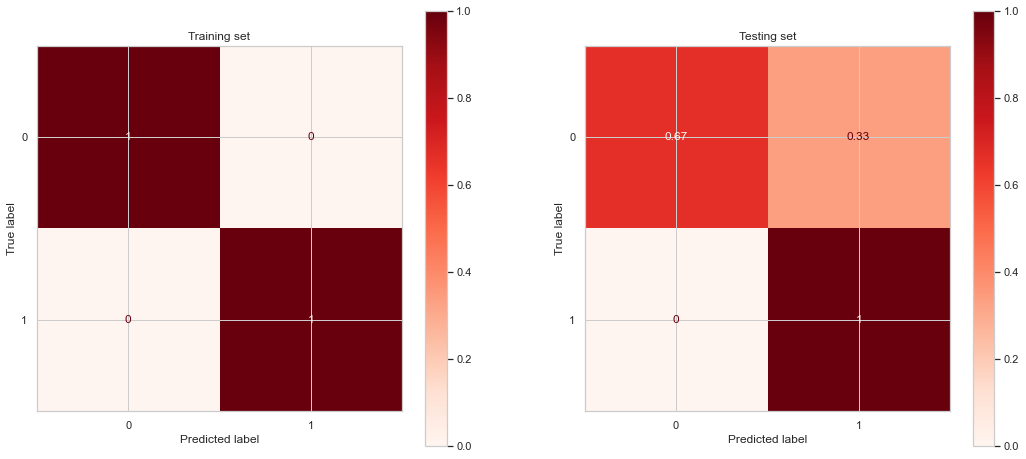

In [57]:
#Classification and confusion matrix on KNN
evaluate_classification("KNN", best_knn, knn_train_report, knn_test_report, cmap="Reds")

When it comes to predicting diseases, the false negative error can be griveously costly, It is better to predict the presence of a disease falsely than to predict the absence of a disease falsely. It is always better to have a model that has zero amount of false positive error than the false negative error. The KNN model had a 0% false negative error and a 33% false positive error.

___

### LGBM Model

#### Instantiating the model

In [58]:
lgbm =LGBMClassifier()

#### Fitting of model on the training set

In [59]:
#Fitting on the train set
lgbm.fit(X_train_processed, y_train)

LGBMClassifier()

#### Predictions

In [60]:
lgbm_train_preds = lgbm.predict(X_train_processed)
lgbm_test_preds = lgbm.predict(X_test_processed)

**Predictions on the training set**

In [61]:
training_set =pd.DataFrame(lgbm_train_preds)
training_set = training_set.rename(columns ={0 :"Train preds"})
training_set.head()

,Train preds
0,1
1,0
2,0
3,1
4,1


**Predictions on the testing set**

In [62]:
testing_set =pd.DataFrame(lgbm_test_preds)
testing_set = testing_set.rename(columns ={0 :"Test preds"})
testing_set.head()

,Test preds
0,1
1,1
2,1
3,1
4,0


### Model Evaluation

#### Accuracy

In [63]:
# Calculate classification accuracy scores
lgbm_train_accuracy = lgbm.score(X_train_processed, y_train)
lgbm_test_accuracy = lgbm.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'LGBM Train Accuracy Score: {round(lgbm_train_accuracy, 2)}')
print(f'LGBM Test Accuracy Score: {round(lgbm_test_accuracy, 2)}')

LGBM Train Accuracy Score: 1.0
LGBM Test Accuracy Score: 0.94


#### Recall

In [64]:
# Calculate classification recall scores
lgbm_train_recall = recall_score(y_train, lgbm_train_preds, pos_label=1)
lgbm_test_recall = recall_score(y_test, lgbm_test_preds, pos_label=1)
# Print classification recall scores
print(f'LGBM Train Recall Score = {round(lgbm_train_recall, 2)}')
print(f'LGBM Test Recall Score = {round(lgbm_test_recall, 2)}')

LGBM Train Recall Score = 1.0
LGBM Test Recall Score = 0.97


#### Precision

In [65]:
# Calculate classification precision scores
lgbm_train_precision = precision_score(y_train, lgbm_train_preds)#, pos_label=1)
lgbm_test_precision = precision_score(y_test, lgbm_test_preds)#, pos_label=1)
# Print recall scores
print(f'LGBM Train Precision Score = {round(lgbm_train_precision, 3)}')
print(f'LGBM Test Precision Score = {round(lgbm_test_precision, 3)}')

LGBM Train Precision Score = 1.0
LGBM Test Precision Score = 0.947


#### AUC

In [66]:
# Calculate AUC scores
lgbm_train_auc = roc_auc_score(y_train, lgbm.predict_proba(X_train_processed)[:,1])
lgbm_test_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'LGBM Train AUC: {round(lgbm_train_auc, 3)}')
print(f'LGBM Test AUC: {round(lgbm_test_auc, 3)}')

LGBM Train AUC: 1.0
LGBM Test AUC: 0.984


In [67]:
lgbm_train_report =classification_report(y_train, lgbm_train_preds)
lgbm_test_report = classification_report(y_test, lgbm_test_preds)

### LGBM Classification report and Confusion Matrix

Classification metrics on LGBM model

Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       110

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

_____________________________________________________

Testing set:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.95      0.97      0.96        37

    accuracy                           0.94        49
   macro avg       0.93      0.90      0.91        49
weighted avg       0.94      0.94      0.94        49



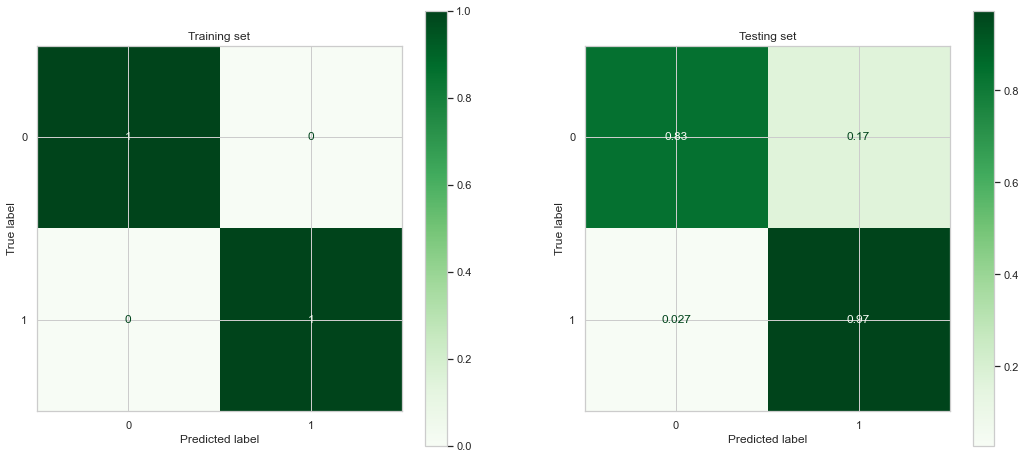

In [68]:
#Classification and confusion matrix on LGBM
evaluate_classification("LGBM", lgbm, lgbm_train_report, lgbm_test_report, cmap="Greens")

The LGBM model made all predictions accurately on the training  set, but it made a 3% false negative error on the testing set.

___

### XGBoost Classifier(XGBC)

#### Instantiating Model

In [69]:
xgb = XGBClassifier()

In [70]:
xgb.fit(X_train_processed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [71]:
xgb_train_preds = xgb.predict(X_train_processed)
xgb_test_preds = xgb.predict(X_test_processed)

**Predictions on the training set**

In [72]:
training_set =pd.DataFrame(xgb_train_preds)
training_set = training_set.rename(columns ={0 :"XGB: Train preds"})
training_set.head()

,XGB: Train preds
0,1
1,0
2,0
3,1
4,1


**Predictions on the testing set**

In [73]:
testing_set =pd.DataFrame(xgb_test_preds)
testing_set = testing_set.rename(columns ={0 :"XGB: Test preds"})
testing_set.head(10)

,XGB: Test preds
0,1
1,1
2,1
3,1
4,0
5,0
6,1
7,1
8,1
9,0


## Model Evaluation

### Scores

#### Accuracy

In [74]:
# Calculate classification accuracy scores
xgb_train_accuracy = xgb.score(X_train_processed, y_train)
xgb_test_accuracy = xgb.score(X_test_processed, y_test)
# Print classification accuracy scores
print(f'XGB Train Accuracy Score: {round(xgb_train_accuracy, 3)}')
print(f'XGB Test Accuracy Score: {round(xgb_test_accuracy, 3)}')

XGB Train Accuracy Score: 1.0
XGB Test Accuracy Score: 0.939


#### Recall

In [75]:
# Calculate classification recall scores
xgb_train_recall = recall_score(y_train, xgb_train_preds, pos_label=1)
xgb_test_recall = recall_score(y_test,xgb_test_preds, pos_label=1)
# Print classification recall scores
print(f'XGB Train Recall Score = {round(xgb_train_recall, 3)}')
print(f'XGB Test Recall Score = {round(xgb_test_recall, 3)}')

XGB Train Recall Score = 1.0
XGB Test Recall Score = 0.973


#### Precision

In [76]:
# Calculate classification precision scores
xgb_train_precision = precision_score(y_train, xgb_train_preds)#, pos_label=1)
xgb_test_precision = precision_score(y_test, xgb_test_preds)#, pos_label=1)
# Print recall scores
print(f'XGB Train Precision Score = {round(xgb_train_precision, 3)}')
print(f'XGB Test Precision Score = {round(xgb_test_precision, 3)}')

XGB Train Precision Score = 1.0
XGB Test Precision Score = 0.947


#### AUC

In [77]:
# Calculate AUC scores
xgb_train_auc = roc_auc_score(y_train, xgb.predict_proba(X_train_processed)[:,1])
xgb_test_auc = roc_auc_score(y_test, xgb.predict_proba(X_test_processed)[:,1])
# Display AUC scores
print(f'XGB Train AUC: {round(xgb_train_auc, 3)}')
print(f'XGB Test AUC: {round(xgb_test_auc, 3)}')

XGB Train AUC: 1.0
XGB Test AUC: 0.984


In [78]:
xgb_train_report =classification_report(y_train, xgb_train_preds)
xgb_test_report = classification_report(y_test, xgb_test_preds)

## XGB Classification report and confusion matrix

Classification metrics on XGB model

Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       110

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146

_____________________________________________________

Testing set:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.95      0.97      0.96        37

    accuracy                           0.94        49
   macro avg       0.93      0.90      0.91        49
weighted avg       0.94      0.94      0.94        49



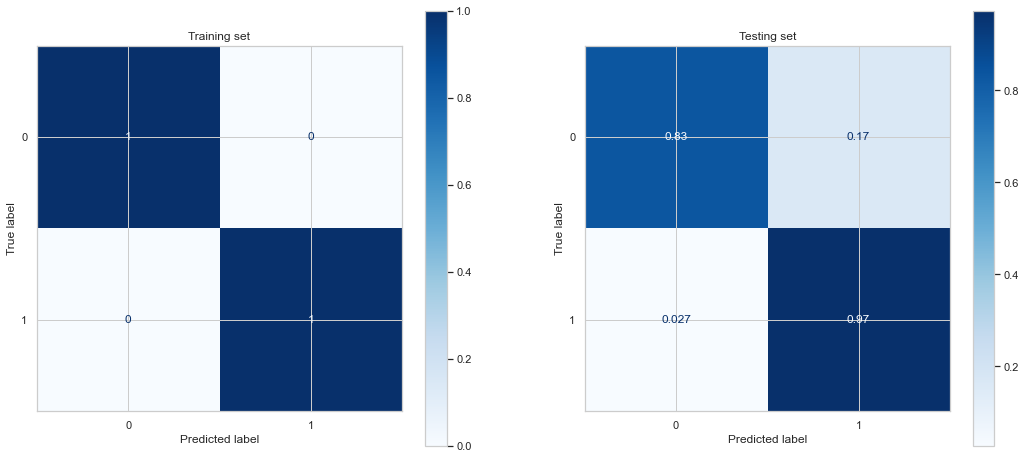

In [79]:
#classification report and confusion matrix
evaluate_classification("XGB", xgb, xgb_train_report, xgb_test_report, cmap ="Blues")

### Confusion Matrix

The XGB model made all predictions accurately on the training set. As for the testing set, the model also made about 3% false negative errors on the testing set.

### Comparing the preformance of all three models.

In [80]:
#### A function to collect all model scores for each evaluation metric in a dataframe 

In [81]:
def model_report(model, scoring = "accuracy", model_name = "Classifier"):

  scoring_func = get_scorer(scoring)
  train_score = scoring_func(model, X_train_processed, y_train)
  test_score = scoring_func(model, X_test_processed, y_test)

  delta_score  = train_score -test_score
  

  score_dict ={f'{scoring}:train': train_score,
               f'{scoring}:test': test_score,
               f'{scoring}:difference' : delta_score}

  score_frame = pd.DataFrame(score_dict, index=[model_name])

  return(score_frame)

In [82]:
def model_recall(model, scoring = "recall", model_name = "Classifier"):

  scoring_func = get_scorer(scoring)
  train_score = scoring_func(model, X_train_processed, y_train)
  test_score = scoring_func(model, X_test_processed, y_test)

  delta_score  = train_score -test_score
  

  score_dict ={f'{scoring}:train': train_score,
               f'{scoring}:test': test_score,
               f'{scoring}:difference' : delta_score}

  score_frame = pd.DataFrame(score_dict, index=[model_name])

  return(score_frame)

In [83]:
def model_precision(model, scoring = "precision", model_name = "Classifier"):

  scoring_func = get_scorer(scoring)
  train_score = scoring_func(model, X_train_processed, y_train)
  test_score = scoring_func(model, X_test_processed, y_test)

  delta_score  = train_score -test_score
  

  score_dict ={f'{scoring}:train': train_score,
               f'{scoring}:test': test_score,
               f'{scoring}:difference' : delta_score}

  score_frame = pd.DataFrame(score_dict, index=[model_name])

  return(score_frame)

In [84]:
def model_AUC(model, model_name):

  train_score = roc_auc_score(y_train, model.predict_proba(X_train_processed)[:,1])
  test_score = roc_auc_score(y_test, model.predict_proba(X_test_processed)[:,1])

  delta_score  = train_score -test_score
  

  score_dict ={f'AUC:train': train_score,
               f'AUC:test': test_score,
               f'AUC:difference' : delta_score}

  score_frame = pd.DataFrame(score_dict, index=[model_name])

  return(score_frame)

In [85]:
#Accuracy Scores
model_accuracy_reports= model_report(best_knn, scoring ="accuracy", model_name ="KNN Classifier")
model_accuracy_reports= model_accuracy_reports.append(model_report(lgbm, model_name ="LGBM Classifier"))
model_accuracy_reports= model_accuracy_reports.append(model_report(xgb, model_name ="XGBoost Classifier"))

#Recall Scores
model_recall_report= model_recall(model = best_knn, model_name ="KNN Classifier")
model_recall_report= model_recall_report.append(model_recall(model =lgbm, model_name ="LGBM Classifier"))
model_recall_report= model_recall_report.append(model_recall(model =xgb, model_name ="XGBoost Classifier"))

#Precision Scores
model_precision_report= model_precision(best_knn,scoring = "precision", model_name ="KNN Classifier")
model_precision_report= model_precision_report.append(model_precision(lgbm, model_name ="LGBM Classifier"))
model_precision_report= model_precision_report.append(model_precision(xgb, model_name ="XGBoost Classifier"))

#AUC scores
model_AUC_report= model_AUC( model =best_knn, model_name= 'KNN Classfier')
model_AUC_report= model_AUC_report.append(model_AUC( model =lgbm, model_name ='LGBM Classifier'))
model_AUC_report= model_AUC_report.append(model_AUC(model= xgb, model_name ='XGBoost Classifier'))


#### Accuracy Scores
This metric aims to answer the following question: “of all the predictions made by the model, what percentage did it get correct?”. The correct predictions correspond to the True Positives and True Negatives

In [86]:
model_accuracy_reports

,accuracy:train,accuracy:test,accuracy:difference
KNN Classifier,1.0,0.918367,0.081633
LGBM Classifier,1.0,0.938776,0.061224
XGBoost Classifier,1.0,0.938776,0.061224


#### Recall Scores
>Specificity: This metric is very similar to sensitivity, and can be computed from the answer to this question: “how good was the model at predicting Actual NO events?”.


>Sensitivity:
To be able to get the sensitivity of the model, we have to answer the following question: “how good was the model at predicting Actual YES events?”, which can be seen as the flip of precision.

In [87]:
model_recall_report

,recall:train,recall:test,recall:difference
KNN Classifier,1.0,1.000000,0.000000
LGBM Classifier,1.0,0.972973,0.027027
XGBoost Classifier,1.0,0.972973,0.027027


#### Precision Scores
This is used to answer the following question: “of all the YES predictions, how many of them were correct?”

In [88]:
model_precision_report

,precision:train,precision:test,precision:difference
KNN Classifier,1.0,0.902439,0.097561
LGBM Classifier,1.0,0.947368,0.052632
XGBoost Classifier,1.0,0.947368,0.052632


#### AUC Scores

In [89]:
model_AUC_report

,AUC:train,AUC:test,AUC:difference
KNN Classfier,1.0,0.975225,0.024775
LGBM Classifier,1.0,0.984234,0.015766
XGBoost Classifier,1.0,0.984234,0.015766


### Strategies to choose the right model based on the evaluation metric.

**Accuracy**

This is the metric to use when:

>The cost of False Positive and False Negative are roughly equal

>The benefit of a True Positive and a True Negative are roughly equal

**Recall**

Using sensitivity and specificity aims to keep the number of False Negative and False Positive respectively as low as possible since we might want to increase the model sensitivity. Recall is the metric to use when:

>The cost of False Negative is much higher than a False Positive

>The cost of a True Negative is much higher than a True Positive

**Precision**

This is the metric to use when:

>The cost of a False Positive is much higher than a False Negative

>The Benefit of a True Positive is much higher than a True Negative

**Chosen Evaluation Metric**

This project aims at training a model to identify if a patient has a parkinson's disease or not, a False Negative might be very costly, because it might delay the treatment of the patient, which might even lead to death, because a quick identification of a disease could help for a better treatment. In the other hand, a False Positive may only lead to additional tests which might be financially costly but not as costly as the life of a human being. That being said, the chosen evaluation metric will be the **recall score.**

## Results


All three models performed well on the training set. As for the testing set,the KNN model performed the best with a recall score of 1, it made no false negative error, which would have been very costly. The LGBM and XGB model had same recall score of .97.

## Conclusion
Three models, KNN, LGBM,and XGB, were built and tunned for the detection of early stage parkinson's disease, out of these models, the KNN model is the most suitable model with a high recall score of 1.



## Recommendation
The primary rationales for early detection and initiation of treatment in patients with PD include slowing disease progression, delaying and diminishing symptoms (both motor and nonmotor), limiting deterioration of patient quality of life (QoL), and achieving long-term cost savings.The KNN model, with its tunned parameters can be used to accurately predict the early stage of Parkinson's disease in individuals, using the voice analysis. 